## Task I

1. There are 82 columns in the dataset. There are a few missing values (NaNs) and outliers in the data which need to be fixed.
2. We created boxplots of features to see if there are any outliers. We've used interquartile range (IQR) to detect any outliers that are present in the data. Once detected, we've removed all the outliers from the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import seaborn as sns

In [3]:
dataset_A = pd.read_csv("DataA.csv")

copy_DataA = dataset_A 
print(dataset_A.head())

   Unnamed: 0  fea.1  fea.2  fea.3  fea.4   fea.5  fea.6  fea.7  fea.8  fea.9  \
0           1 -153.0  414.0  939.0 -161.0  1007.0   99.0 -210.0  948.0  333.0   
1           2 -150.0  420.0  939.0 -177.0  1008.0  103.0 -207.0  939.0  316.0   
2           3 -160.0  432.0  941.0 -162.0   982.0   98.0 -198.0  936.0  315.0   
3           4 -171.0  432.0  911.0 -174.0   999.0  115.0 -187.0  918.0  338.0   
4           5 -171.0    NaN  929.0 -189.0  1004.0  104.0 -198.0  939.0  350.0   

    ...    fea.72  fea.73  fea.74  fea.75  fea.76  fea.77  fea.78  fea.79  \
0   ...     655.0  -316.0  -302.0  -617.0  -955.0  -264.0    23.0   -29.0   
1   ...     655.0  -309.0  -304.0  -619.0  -955.0  -265.0    19.0   -31.0   
2   ...     655.0  -302.0  -308.0  -621.0  -966.0  -270.0    10.0   -38.0   
3   ...     655.0  -293.0  -312.0  -622.0  -964.0  -269.0    14.0   -51.0   
4   ...     655.0  -284.0  -318.0  -624.0  -966.0  -262.0    24.0   -40.0   

   fea.80  fea.81  
0    36.0    24.0  
1    47.0 

In [4]:
dataset_A = pd.read_csv("DataA.csv")

copy_DataA = dataset_A 
print(dataset_A.head())

#print(dataset_A.describe())

   Unnamed: 0  fea.1  fea.2  fea.3  fea.4   fea.5  fea.6  fea.7  fea.8  fea.9  \
0           1 -153.0  414.0  939.0 -161.0  1007.0   99.0 -210.0  948.0  333.0   
1           2 -150.0  420.0  939.0 -177.0  1008.0  103.0 -207.0  939.0  316.0   
2           3 -160.0  432.0  941.0 -162.0   982.0   98.0 -198.0  936.0  315.0   
3           4 -171.0  432.0  911.0 -174.0   999.0  115.0 -187.0  918.0  338.0   
4           5 -171.0    NaN  929.0 -189.0  1004.0  104.0 -198.0  939.0  350.0   

    ...    fea.72  fea.73  fea.74  fea.75  fea.76  fea.77  fea.78  fea.79  \
0   ...     655.0  -316.0  -302.0  -617.0  -955.0  -264.0    23.0   -29.0   
1   ...     655.0  -309.0  -304.0  -619.0  -955.0  -265.0    19.0   -31.0   
2   ...     655.0  -302.0  -308.0  -621.0  -966.0  -270.0    10.0   -38.0   
3   ...     655.0  -293.0  -312.0  -622.0  -964.0  -269.0    14.0   -51.0   
4   ...     655.0  -284.0  -318.0  -624.0  -966.0  -262.0    24.0   -40.0   

   fea.80  fea.81  
0    36.0    24.0  
1    47.0 

In [5]:
#Deleting rows that have 15 or less number of values - i.e., rows with more than 80% NaN
DataA_cleaned = dataset_A.dropna(thresh=15)
print(DataA_cleaned.shape)

(18227, 82)


In [6]:
#There are still some NaNs which are replaced by mean in the following command
DataA_mean = DataA_cleaned.replace(np.nan,DataA_cleaned.mean(axis=0))
DataA_mean.describe()

Unnamed: 0         fea.1         fea.2         fea.3         fea.4  \
count  18227.000000  18227.000000  18227.000000  18227.000000  18227.000000   
mean    9114.000000   -132.812384    698.264485    597.541402   -307.128462   
std     5261.826014    280.937065    371.370878    392.123815    183.015924   
min        1.000000  -2724.000000   -855.000000  -2196.000000  -1365.000000   
25%     4557.500000   -176.000000    362.000000    311.000000   -408.500000   
50%     9114.000000   -104.000000    795.000000    590.000000   -266.000000   
75%    13670.500000    -17.000000    982.000000    952.000000   -167.000000   
max    18227.000000   1887.000000   2531.000000   2941.000000    609.000000   

              fea.5         fea.6         fea.7         fea.8         fea.9  \
count  18227.000000  18227.000000  18227.000000  18227.000000  18227.000000   
mean     909.548077    -32.760824     61.974363    899.313498     81.650478   
std      193.819578    253.812810    316.277302    196.136875    326.750917   
min     -245.000000   -920.000000  -1580.000000   -149.000000  -1624.000000   
25%      861.000000   -144.000000   -129.500000    855.000000   -153.000000   
50%      969.000000    -39.000000     67.000000    945.000000     45.000000   
75%     1006.000000     45.000000    249.000000    996.000000    314.000000   
max     1833.000000   1215.000000   1490.000000   1682.000000   1096.000000   

           ...             fea.72        fea.73        fea.74        fea.75  \
count      ...       18227.000000  18227.000000  18227.000000  18227.000000   
mean       ...        -124.658035    -37.973391    137.400176    374.762934   
std        ...         481.492994    355.841529    352.788441    583.792739   
min        ...        -953.000000   -853.000000   -771.000000   -984.000000   
25%        ...        -487.000000   -323.000000   -173.000000     29.000000   
50%        ...        -223.000000     32.000000    251.000000    698.000000   
75%        ...         174.000000    179.000000    413.000000    823.000000   
max        ...         949.000000    775.000000    759.000000    999.000000   

             fea.76        fea.77        fea.78        fea.79        fea.80  \
count  18227.000000  18227.000000  18227.000000  18227.000000  18227.000000   
mean    -880.583804    -47.607780    137.641192    -18.099523      4.671257   
std      217.634117    373.064609    248.988603    778.015520    480.779966   
min    -2562.000000  -5424.000000  -3133.000000  -7189.000000  -5861.000000   
25%     -983.000000   -276.000000     31.000000   -246.500000   -118.000000   
50%     -940.000000      0.000000    132.000000    -29.000000      4.000000   
75%     -840.000000    225.000000    276.000000    195.000000    115.000000   
max      613.000000   4877.000000   3742.000000   7497.000000   8675.000000   

             fea.81  
count  18227.000000  
mean      20.726834  
std      455.160604  
min    -3051.000000  
25%     -115.000000  
50%       19.000000  
75%      169.000000  
max     5821.000000  

[8 rows x 82 columns]

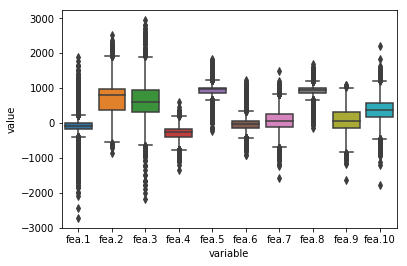

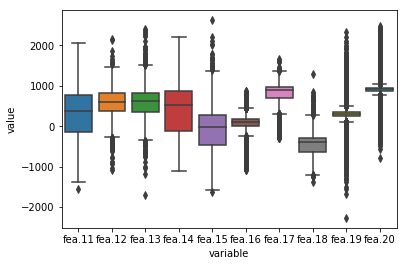

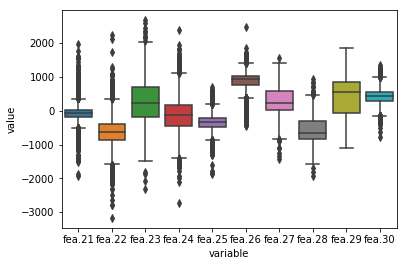

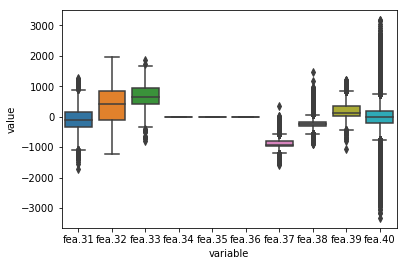

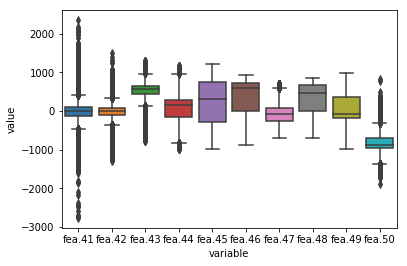

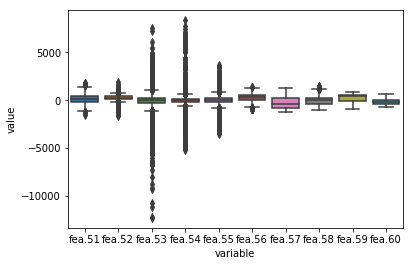

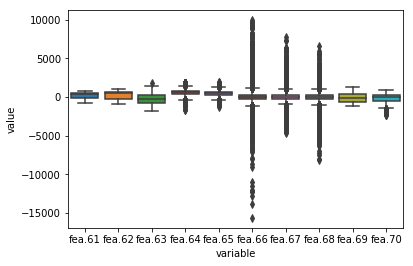

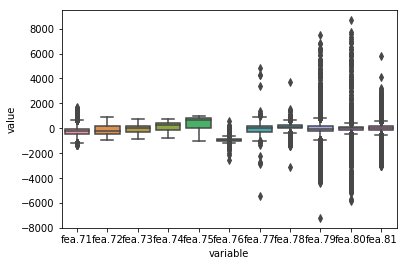

In [7]:
DataA_subset1 = DataA_mean[['fea.1','fea.2','fea.3','fea.4','fea.5','fea.6','fea.7','fea.8','fea.9','fea.10']]
#print(DataA_subset1.shape)
sns.boxplot(x="variable", y="value", data=pd.melt(DataA_subset1))
plt.show()

DataA_subset2 = DataA_mean[['fea.11','fea.12','fea.13','fea.14','fea.15','fea.16','fea.17','fea.18','fea.19','fea.20']]
sns.boxplot(x="variable", y="value", data=pd.melt(DataA_subset2))
plt.show()

DataA_subset3 = DataA_mean[['fea.21','fea.22','fea.23','fea.24','fea.25','fea.26','fea.27','fea.28','fea.29','fea.30']]
sns.boxplot(x="variable", y="value", data=pd.melt(DataA_subset3))
plt.show()

DataA_subset4 = DataA_mean[['fea.31','fea.32','fea.33','fea.34','fea.35','fea.36','fea.37','fea.38','fea.39','fea.40']]
sns.boxplot(x="variable", y="value", data=pd.melt(DataA_subset4))
plt.show()

DataA_subset5 = DataA_mean[['fea.41','fea.42','fea.43','fea.44','fea.45','fea.46','fea.47','fea.48','fea.49','fea.50']]
sns.boxplot(x="variable", y="value", data=pd.melt(DataA_subset5))
plt.show()

DataA_subset6 = DataA_mean[['fea.51','fea.52','fea.53','fea.54','fea.55','fea.56','fea.57','fea.58','fea.59','fea.60']]
sns.boxplot(x="variable", y="value", data=pd.melt(DataA_subset6))
plt.show()

DataA_subset7 = DataA_mean[['fea.61','fea.62','fea.63','fea.64','fea.65','fea.66','fea.67','fea.68','fea.69','fea.70']]
sns.boxplot(x="variable", y="value", data=pd.melt(DataA_subset7))
plt.show()

DataA_subset8 = DataA_mean[['fea.71','fea.72','fea.73','fea.74','fea.75','fea.76','fea.77','fea.78','fea.79','fea.80','fea.81']]
sns.boxplot(x="variable", y="value", data=pd.melt(DataA_subset8))
plt.show()

As is evident from the box plots, there are several outliers in almost all of the features. We have used interquartile range to remove outliers from the data

In [8]:
#Calculating the interquartile range for each column
Q1 = DataA_cleaned.quantile(0.25)
Q3 = DataA_cleaned.quantile(0.75)
IQR = Q3-Q1
#print(IQR)

lowerQ = DataA_cleaned < (Q1-1.5*IQR)
upperQ = DataA_cleaned > (Q3+1.5*IQR)
IQR_test = lowerQ | upperQ

#dataframe containing all the outliers after they are removed detected using IQR
df_iqr = DataA_mean[~((DataA_mean < (Q1 - 1.5 * IQR)) |(DataA_mean > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_iqr.shape)

#replacing NaN with mean of each column
filtered_df = df_iqr.replace(np.nan,df_iqr.mean(axis=0))


(6048, 82)


In [81]:
#Min Max Scaling
min_max_scaling = preprocessing.MinMaxScaler()

mm_scaled_data = min_max_scaling.fit_transform(filtered_df)

df_A_min_max = pd.DataFrame(mm_scaled_data)

df_A_min_max.columns = filtered_df.columns

#Z-Score Normalization 

z_normalized = stats.zscore(filtered_df)

df_A_z_normalized = pd.DataFrame(z_normalized)

df_A_z_normalized.columns = filtered_df.columns


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


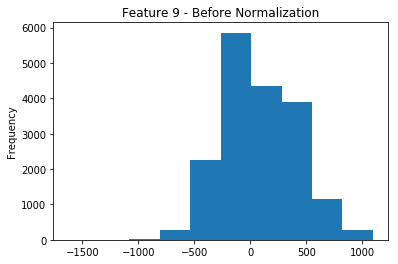

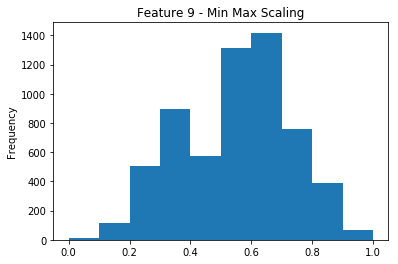

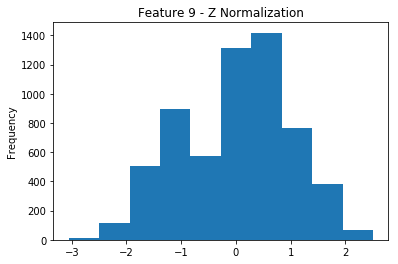

In [82]:
#before normalization

hist_A_9 = copy_DataA['fea.9'].plot.hist(title='Feature 9 - Before Normalization');
plt.show()

#Min Max Scaling
hist_A_mm_9 = df_A_min_max['fea.9'].plot.hist(title='Feature 9 - Min Max Scaling');
plt.show()

# Z Score Normalization
hist_A_z_9 = df_A_z_normalized['fea.9'].plot.hist(title='Feature 9 - Z Normalization');
plt.show()


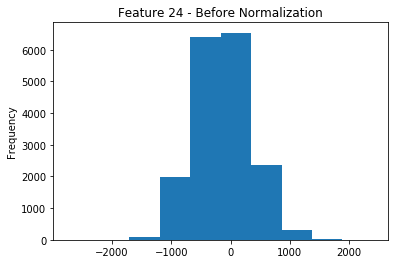

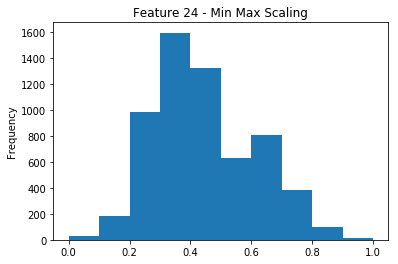

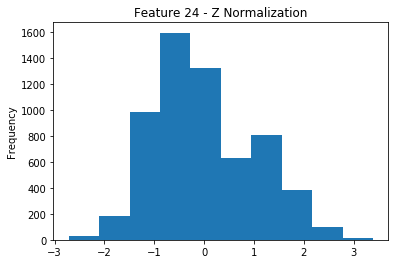

In [11]:
#Before Normalization
hist_A_24 = copy_DataA['fea.24'].plot.hist(title='Feature 24 - Before Normalization');
plt.show()

# Min Max Scaling
hist_A_mm_24 = df_A_min_max['fea.24'].plot.hist(title='Feature 24 - Min Max Scaling');
plt.show()

# Z Score Normalization

hist_A_z_24 = df_A_z_normalized['fea.24'].plot.hist(title='Feature 24 - Z Normalization');
plt.show()


As we can see from the histograms of features 9 and 24, the data for both features had different scales, hence it's difficult to compare distributions of both features. However, after normalization/min-max scaling, both the features have same scales. 
Feature 9 has a negatively skewed distribution whereas Feature 24 has a positive skew.
One of the advantages of scaling/normalization is also that it aids in comparing data that are of various types. Once normalized, it's easier to compare and treat them as similar data types.

## Task II

In [54]:
import scipy.io as sp
import sklearn.preprocessing
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Part 1

In [13]:
dataB = pd.read_csv("DataB.csv", index_col = 0)

dataB.head()
dataB.shape
mean_cols = dataB.mean(axis=0)
mean_cols.shape

# Mean-normalization of the dataset by subtracting the mean of the columns
for i in range(0, len(dataB.columns)):
    dataB.iloc[:, i] = dataB.iloc[:, i] - mean_cols[i]
dataB.head()
#dataB.dtypes
#dataB.isna().sum()

fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10 ...   \
1      4      4      3      0      0      4      2      1      4       1 ...    
2      5      1      4      3      1      3      5      1      4       4 ...    
3      1      3      0      3      1      1      0      1      0       2 ...    
4      5      3      2      3      5      2      2      0      4       5 ...    
5      3      5      3      3      0      4      1      1      4       3 ...    

   fea.776  fea.777  fea.778  fea.779  fea.780  fea.781  fea.782  fea.783  \
1        1        3        0        4        2        1        1        4   
2        1        1        3        3        1        3        3        5   
3        3        0        2        4        2        2        1        2   
4        5        4        5        1        4        4        2        4   
5        1        3        3        3        1        2        4        1   

   fea.784  gnd  
1        5    0  
2        4    0  
3        4    0  
4        4    0  
5        1    0  

[5 rows x 785 columns]

(2066, 785)

(785,)

fea.1     fea.2     fea.3     fea.4     fea.5     fea.6     fea.7  \
1  1.491772  1.452565  0.539206 -2.496612 -2.472894  1.509681 -0.486447   
2  2.491772 -1.547435  1.539206  0.503388 -1.472894  0.509681  2.513553   
3 -1.508228  0.452565 -2.460794  0.503388 -1.472894 -1.490319 -2.486447   
4  2.491772  0.452565 -0.460794  0.503388  2.527106 -0.490319 -0.486447   
5  0.491772  2.452565  0.539206  0.503388 -2.472894  1.509681 -1.486447   

      fea.8     fea.9    fea.10    ...      fea.776   fea.777   fea.778  \
1 -1.512585  1.477735 -1.482091    ...    -1.469506  0.477251 -2.486447   
2 -1.512585  1.477735  1.517909    ...    -1.469506 -1.522749  0.513553   
3 -1.512585 -2.522265 -0.482091    ...     0.530494 -2.522749 -0.486447   
4 -2.512585  1.477735  2.517909    ...     2.530494  1.477251  2.513553   
5 -1.512585  1.477735  0.517909    ...    -1.469506  0.477251  0.513553   

    fea.779   fea.780   fea.781  fea.782  fea.783   fea.784       gnd  
1  1.550339 -0.498064 -1.525653 -1.54211  1.59971  2.480639 -2.035818  
2  0.550339 -1.498064  0.474347  0.45789  2.59971  1.480639 -2.035818  
3  1.550339 -0.498064 -0.525653 -1.54211 -0.40029  1.480639 -2.035818  
4 -1.449661  1.501936  1.474347 -0.54211  1.59971  1.480639 -2.035818  
5  0.550339 -1.498064 -0.525653  1.45789 -1.40029 -1.519361 -2.035818  

[5 rows x 785 columns]

In [14]:
# As we see that all the columns have filled up values and no null values.
# We have a dataset of 785 features with 2066 samples. And all data points are integers

In [15]:
# Calculating the covariance matrix of the dataset
data_cov = np.cov(dataB.iloc[:, :].values.T)
# Eigen values and Eigen vectors computation
eigenvals, eigenvecs = np.linalg.eig(data_cov)
# Descending order of the Eigen values
eigenvals.sort()
eigenvals = np.flipud(eigenvals)

In [16]:
# Calculating the % of variabiloity accounted for by each feature from the features that were sorted
total_var = (eigenvals/sum(eigenvals))*100
pd.DataFrame(total_var)[0:20]

0
0   13.830921
1    8.255611
2    6.319268
3    6.083479
4    5.080714
5    3.832561
6    3.353297
7    2.704559
8    2.610672
9    2.151106
10   1.918077
11   1.751249
12   1.692627
13   1.525610
14   1.394698
15   1.273197
16   1.189024
17   1.161335
18   1.129765
19   1.020898

In [17]:
# So the first PCA feature accounts for 13.83% variability and 
# second PCA feature accounts for 8.25% variation

In [18]:
# Fetching transformed data from PCA's top 2 components

## Part 2

In [25]:
# Using SciKit learn to fetch the extracted top 2 features that account for highest variability
from sklearn.decomposition import PCA
extract_pca2 = PCA(n_components=2)
extract_dataB = extract_pca2.fit_transform(dataB.iloc[:,:].values)

In [26]:
# Checking the size of samples for each feature
extract_dataB[:,0].shape
# Ratio of variability accounted for each of the top 2 principal components
extract_pca2.explained_variance_ratio_
# The "extract_pca2.components_" is the eigen vector matrix
extract_pca2.components_.shape

new_dataB = pd.read_csv("DataB.csv")

# Loading the extracted features of a new dataframe and concatenating the target "gnd" with this dataframe
principal_comp = pd.DataFrame(extract_dataB)
principal_comp = pd.concat([principal_comp, new_dataB["gnd"]], axis=1)

(2066,)

array([0.13830921, 0.08255611])

(2, 785)

In [27]:

principal_comp.head()


0           1  gnd
0  1069.167400 -513.981376    0
1  1099.177250 -570.847139    0
2   673.201827 -167.378890    0
3  1010.903935 -187.045461    0
4  1692.971863 -633.376358    0

Text(0.5,0,'Principal Component 1')

Text(0,0.5,'Principal Component 2')

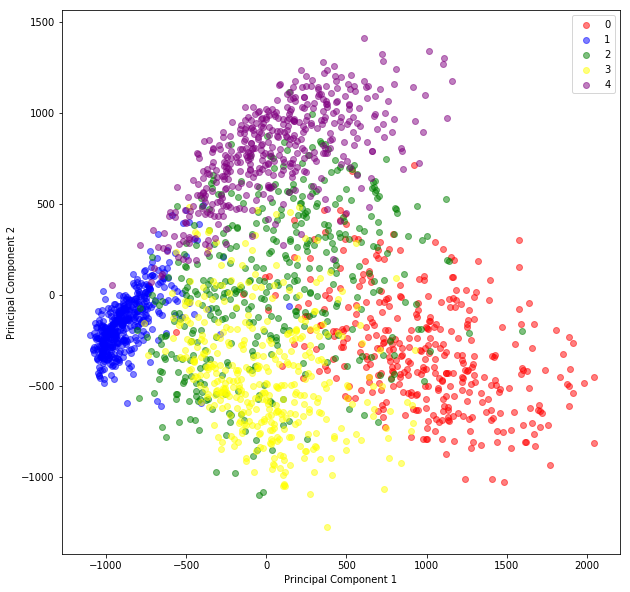

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt

X = []
Y = []
colors = ['red', 'blue', 'green', 'yellow', 'purple']
plt.figure(figsize=(10, 10))

# Plotting datapoints by the values in "gnd" and color by the values.
for i in range(0, len(new_dataB["gnd"].unique())):
    X.append(principal_comp[principal_comp["gnd"] == i].iloc[:, 0].values)
    Y.append(principal_comp[principal_comp["gnd"] == i].iloc[:, 1].values)
    plt.scatter(X[i], Y[i], c=colors[i], alpha=0.5)
plt.legend(principal_comp["gnd"].unique())
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

In [29]:
# As we see above the datapoints plotted above colored by their respective classes as indicated
# by the legends. We can observe that the classes are not well separated. Reason being first two 
# components account for just 13% + 8% = 23% variability. Because of this less variability accounted 
# by the features. So the two feature are not doing as good a job to discriminate between the 
# classes of the data point(samples).

## Part 3

In [30]:
extract_pca6 = PCA(n_components=6)
extract_dataB6 = extract_pca6.fit_transform(dataB.iloc[:,:].values)
new_dataB = pd.read_csv("DataB.csv")
principal_comp6 = pd.DataFrame(extract_dataB6)
principal_comp6 = pd.concat([principal_comp6, new_dataB["gnd"]], axis=1)

In [31]:
extract_pca6.explained_variance_ratio_

array([0.13830921, 0.08255611, 0.06319268, 0.06083479, 0.05080714,
       0.03832561])

Text(0.5,0,'Principal Component 5')

Text(0,0.5,'Principal Component 6')

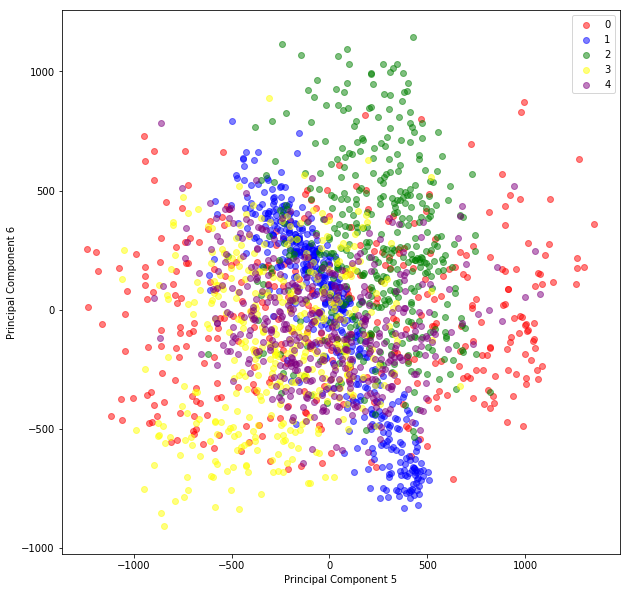

In [32]:
X = []
Y = []
colors = ['red', 'blue', 'green', 'yellow', 'purple']
plt.figure(figsize=(10, 10))
for i in range(0, len(new_dataB["gnd"].unique())):
    X.append(principal_comp6[principal_comp6["gnd"] == i].iloc[:, 4].values)
    Y.append(principal_comp6[principal_comp6["gnd"] == i].iloc[:, 5].values)
    plt.scatter(X[i], Y[i], c=colors[i], alpha=0.5)
plt.legend(principal_comp6["gnd"].unique())
plt.xlabel("Principal Component 5")
plt.ylabel("Principal Component 6")

In [33]:
# As we see above the datapoints plotted above colored by their respective classes as indicated
# by the legends. We can observe that the classes are not well separated. Reason being 5th & 6th 
# components account for approx. 5% and 3% variability. So the two feature are not doing as good a 
# job to discriminate between the classes of the data point(samples). The result is worse than what we
# got from the first two principal components.

## Part 4

In [34]:
from sklearn.naive_bayes import GaussianNB
error = []

In [35]:
extract_pca2 = PCA(n_components=2)
extract_dataB2 = extract_pca2.fit_transform(dataB.iloc[:,:].values)
principal_comp2 = pd.DataFrame(extract_dataB2)
principal_comp2 = pd.concat([principal_comp2, new_dataB["gnd"]], axis=1)
principal_comp2.head()
gnb = GaussianNB()
gnb.fit(principal_comp2[principal_comp2.columns[0:2]].values, principal_comp2["gnd"])
pred_principal_comp2 = gnb.predict(principal_comp2[principal_comp2.columns[0:2]])
error.append(1 - (len(principal_comp2["gnd"]) - (pred_principal_comp2 != principal_comp2["gnd"]).sum())/len(principal_comp2["gnd"]))
error

0           1  gnd
0  1069.167425 -513.980241    0
1  1099.177238 -570.848063    0
2   673.202097 -167.379676    0
3  1010.904197 -187.047882    0
4  1692.971826 -633.372909    0

GaussianNB(priors=None)

[0.2391093901258471]

In [36]:
extract_pca4 = PCA(n_components=4)
extract_dataB4 = extract_pca4.fit_transform(dataB.iloc[:,:].values)
principal_comp4 = pd.DataFrame(extract_dataB4)
principal_comp4 = pd.concat([principal_comp4, new_dataB["gnd"]], axis=1)
principal_comp4.head()
gnb = GaussianNB()
gnb.fit(principal_comp4[principal_comp4.columns[0:4]].values, principal_comp4["gnd"])
pred_principal_comp4 = gnb.predict(principal_comp4[principal_comp4.columns[0:4]])
error.append(1 - (len(principal_comp4["gnd"]) - (pred_principal_comp4 != principal_comp4["gnd"]).sum())/len(principal_comp4["gnd"]))
error

0           1           2           3  gnd
0  1069.167453 -513.979996 -139.243570 -878.385251    0
1  1099.177235 -570.848589  -67.311742 -839.378838    0
2   673.202212 -167.381989  480.985559  -83.847943    0
3  1010.904310 -187.051548  506.348830 -426.467343    0
4  1692.971815 -633.372036 -521.942501 -367.347692    0

GaussianNB(priors=None)

[0.2391093901258471, 0.15730880929332047]

In [37]:
extract_pca10 = PCA(n_components=10)
extract_dataB10 = extract_pca10.fit_transform(dataB.iloc[:,:].values)
principal_comp10 = pd.DataFrame(extract_dataB10)
principal_comp10 = pd.concat([principal_comp10, new_dataB["gnd"]], axis=1)
principal_comp10.head()
gnb = GaussianNB()
gnb.fit(principal_comp10[principal_comp10.columns[0:10]].values, principal_comp10["gnd"])
pred_principal_comp10 = gnb.predict(principal_comp10[principal_comp10.columns[0:10]])
error.append(1 - (len(principal_comp10["gnd"]) - (pred_principal_comp10 != principal_comp10["gnd"]).sum())/len(principal_comp10["gnd"]))
error

0           1           2           3            4           5  \
0  1069.167447 -513.979975 -139.242082 -878.383086  -387.877762 -335.304073   
1  1099.177229 -570.848620  -67.310616 -839.376063  -345.577638 -530.740909   
2   673.202034 -167.379201  480.988743  -83.820345 -1036.833273   76.538633   
3  1010.904134 -187.048310  506.352775 -426.444067  -901.899007   73.660993   
4  1692.971841 -633.372412 -521.942686 -367.353750     6.916862 -601.852264   

            6           7           8           9  gnd  
0 -189.863027  312.633525  111.455240 -125.030061    0  
1 -516.055724   73.659912    9.460681 -329.428404    0  
2 -184.544973  311.417039 -122.126447  444.335829    0  
3 -316.672462  617.908543 -217.484159  135.950462    0  
4 -515.133363 -325.854201  262.232334  321.800492    0

GaussianNB(priors=None)

[0.2391093901258471, 0.15730880929332047, 0.07405614714424003]

In [38]:
extract_pca30 = PCA(n_components=30)
extract_dataB30 = extract_pca30.fit_transform(dataB.iloc[:,:].values)
principal_comp30 = pd.DataFrame(extract_dataB30)
principal_comp30 = pd.concat([principal_comp30, new_dataB["gnd"]], axis=1)
principal_comp30.head()
gnb = GaussianNB()
gnb.fit(principal_comp30[principal_comp30.columns[0:30]].values, principal_comp30["gnd"])
pred_principal_comp30 = gnb.predict(principal_comp30[principal_comp30.columns[0:30]])
error.append(1 - (len(principal_comp30["gnd"]) - (pred_principal_comp30 != principal_comp30["gnd"]).sum())/len(principal_comp30["gnd"]))
error

0           1           2           3            4           5  \
0  1069.167447 -513.979982 -139.242075 -878.383170  -387.877652 -335.305527   
1  1099.177230 -570.848640  -67.310661 -839.375940  -345.577404 -530.737627   
2   673.202034 -167.379176  480.988734  -83.820422 -1036.833155   76.532837   
3  1010.904134 -187.048317  506.352833 -426.443965  -901.898697   73.661912   
4  1692.971842 -633.372426 -521.942606 -367.353430     6.917142 -601.851224   

            6           7           8           9 ...           21  \
0 -189.856538  312.579729  111.441837 -125.324800 ...    80.371110   
1 -516.056102   73.718946    9.522405 -329.660267 ...   116.412490   
2 -184.554954  311.406389 -122.136085  444.769419 ...  -160.857328   
3 -316.675777  617.907666 -217.419554  135.695074 ...    79.713523   
4 -515.146757 -325.771891  262.284170  321.254043 ...   203.118950   

           22          23          24          25          26          27  \
0  114.817363  512.670344  118.623670 -226.203304  104.382305 -148.135944   
1  -45.626938   73.180578  206.912993  -92.810350  -31.925160 -256.122464   
2   81.662726  -63.739474  -94.900281  -31.683894  216.651735  314.363100   
3   68.902000  169.275152  134.436597 -233.811772   86.757895  -42.030205   
4  140.956633 -119.688530   86.115813   95.047287  326.905932   41.172864   

           28          29  gnd  
0    1.916600  -62.284257    0  
1 -278.670947   92.744191    0  
2  -52.603413  -21.153904    0  
3   73.033790   -2.778455    0  
4  137.778415  215.937577    0  

[5 rows x 31 columns]

GaussianNB(priors=None)

[0.2391093901258471,
 0.15730880929332047,
 0.07405614714424003,
 0.06098741529525653]

In [39]:
extract_pca60 = PCA(n_components=60)
extract_dataB60 = extract_pca60.fit_transform(dataB.iloc[:,:].values)
principal_comp60 = pd.DataFrame(extract_dataB60)
principal_comp60 = pd.concat([principal_comp60, new_dataB["gnd"]], axis=1)
principal_comp60.head()
gnb = GaussianNB()
gnb.fit(principal_comp60[principal_comp60.columns[0:60]].values, principal_comp60["gnd"])
pred_principal_comp60 = gnb.predict(principal_comp60[principal_comp60.columns[0:60]])
error.append(1 - (len(principal_comp60["gnd"]) - (pred_principal_comp60 != principal_comp60["gnd"]).sum())/len(principal_comp60["gnd"]))
error

0           1           2           3            4           5  \
0  1069.167447 -513.979982 -139.242075 -878.383170  -387.877653 -335.305524   
1  1099.177230 -570.848640  -67.310661 -839.375940  -345.577407 -530.737617   
2   673.202034 -167.379176  480.988734  -83.820422 -1036.833156   76.532838   
3  1010.904134 -187.048317  506.352834 -426.443965  -901.898697   73.661906   
4  1692.971842 -633.372426 -521.942606 -367.353431     6.917142 -601.851214   

            6           7           8           9 ...           51  \
0 -189.856555  312.579877  111.441720 -125.323885 ...     9.794543   
1 -516.056159   73.719162    9.522665 -329.658998 ...   -58.740073   
2 -184.554934  311.406479 -122.135926  444.769885 ...    24.887647   
3 -316.675778  617.907762 -217.419619  135.695083 ...  -133.403158   
4 -515.146825 -325.772034  262.284378  321.253859 ...   109.605251   

           52          53         54          55          56          57  \
0 -157.714488   31.991890   8.772996  126.119144   24.776630 -104.125275   
1 -108.087018 -176.255919 -73.814846  181.770739  153.102214   44.759160   
2  111.010130    2.764357  93.547809   69.715908   75.752142  -12.697860   
3  -38.068918  -29.955211  33.366259    0.700009  -48.852795  -91.610228   
4  -33.319009   29.165827 -40.784563   72.986171   30.676610    0.287693   

           58         59  gnd  
0   93.171566 -83.164317    0  
1   38.970818  74.106739    0  
2  -66.916558  -6.904197    0  
3  -67.102151 -69.804501    0  
4  138.485786  87.246235    0  

[5 rows x 61 columns]

GaussianNB(priors=None)

[0.2391093901258471,
 0.15730880929332047,
 0.07405614714424003,
 0.06098741529525653,
 0.046950629235237185]

In [40]:
extract_pca200 = PCA(n_components=200)
extract_dataB200 = extract_pca200.fit_transform(dataB.iloc[:,:].values)
principal_comp200 = pd.DataFrame(extract_dataB200)
principal_comp200 = pd.concat([principal_comp200, new_dataB["gnd"]], axis=1)
principal_comp200.head()
gnb = GaussianNB()
gnb.fit(principal_comp200[principal_comp200.columns[0:200]].values, principal_comp200["gnd"])
pred_principal_comp200 = gnb.predict(principal_comp200[principal_comp200.columns[0:200]])
error.append(1 - (len(principal_comp200["gnd"]) - (pred_principal_comp200 != principal_comp200["gnd"]).sum())/len(principal_comp200["gnd"]))
error

0           1           2           3            4           5  \
0  1069.167447 -513.979982 -139.242075 -878.383170  -387.877653 -335.305524   
1  1099.177230 -570.848640  -67.310661 -839.375940  -345.577407 -530.737617   
2   673.202034 -167.379176  480.988734  -83.820422 -1036.833156   76.532838   
3  1010.904134 -187.048317  506.352834 -426.443965  -901.898697   73.661906   
4  1692.971842 -633.372426 -521.942606 -367.353431     6.917142 -601.851214   

            6           7           8           9 ...         191        192  \
0 -189.856555  312.579878  111.441721 -125.323886 ...  -21.840201 -39.221081   
1 -516.056159   73.719162    9.522664 -329.658998 ...   56.697119   6.246313   
2 -184.554934  311.406479 -122.135926  444.769884 ...  -40.826166 -31.430966   
3 -316.675777  617.907763 -217.419620  135.695083 ...  -10.493386  25.805538   
4 -515.146825 -325.772035  262.284378  321.253860 ...   47.572784   3.020296   

         193        194        195        196        197        198  \
0 -16.817975  31.821230 -28.126690 -40.262432  10.921017  10.464787   
1  -7.065857  11.278422 -13.704923  21.826297 -29.140325  29.246532   
2 -37.971183 -31.831314  -4.738889  18.179151 -33.547998  -5.801098   
3 -44.585034  29.118615 -24.233662   1.261175  -5.219423   8.207349   
4 -50.221106  39.483184   4.257782  -7.386677  13.077309 -32.563864   

         199  gnd  
0 -36.853553    0  
1  46.866595    0  
2 -66.795025    0  
3 -20.430314    0  
4   5.618367    0  

[5 rows x 201 columns]

GaussianNB(priors=None)

[0.2391093901258471,
 0.15730880929332047,
 0.07405614714424003,
 0.06098741529525653,
 0.046950629235237185,
 0.05953533397870281]

In [41]:
extract_pca500 = PCA(n_components=500)
extract_dataB500 = extract_pca500.fit_transform(dataB.iloc[:,:].values)
principal_comp500 = pd.DataFrame(extract_dataB500)
principal_comp500 = pd.concat([principal_comp500, new_dataB["gnd"]], axis=1)
principal_comp500.head()
gnb = GaussianNB()
gnb.fit(principal_comp500[principal_comp500.columns[0:500]].values, principal_comp500["gnd"])
pred_principal_comp500 = gnb.predict(principal_comp500[principal_comp500.columns[0:500]])
error.append(1 - (len(principal_comp500["gnd"]) - (pred_principal_comp500 != principal_comp500["gnd"]).sum())/len(principal_comp500["gnd"]))
error

0           1           2           3            4           5  \
0  1069.167447 -513.979982 -139.242075 -878.383170  -387.877653 -335.305524   
1  1099.177230 -570.848640  -67.310661 -839.375940  -345.577407 -530.737617   
2   673.202034 -167.379176  480.988734  -83.820422 -1036.833156   76.532838   
3  1010.904134 -187.048317  506.352834 -426.443965  -901.898697   73.661906   
4  1692.971842 -633.372426 -521.942606 -367.353431     6.917142 -601.851214   

            6           7           8           9 ...        491        492  \
0 -189.856555  312.579878  111.441721 -125.323886 ...   2.644031  -4.866210   
1 -516.056159   73.719162    9.522665 -329.658998 ...  -2.627148  10.468830   
2 -184.554934  311.406479 -122.135926  444.769884 ...   3.064326  -4.427822   
3 -316.675777  617.907763 -217.419619  135.695082 ...  -1.960949  -4.000575   
4 -515.146825 -325.772035  262.284378  321.253860 ...  -3.185467   3.851366   

        493       494       495       496       497       498       499  gnd  
0 -2.408003 -0.050782 -4.281718 -1.238061  0.493937 -0.703512  0.750491    0  
1  1.801156  1.513341 -0.279325 -1.665894  0.613016 -2.216247  1.923447    0  
2  3.108722  1.773578  1.753593  2.295008 -0.763054  4.385858  1.141675    0  
3  4.119180  1.253399 -3.412611 -3.953087  3.962505 -6.628774  1.569602    0  
4  1.123459 -1.458513 -0.238140 -3.437944 -5.147792 -9.513241 -1.588074    0  

[5 rows x 501 columns]

GaussianNB(priors=None)

[0.2391093901258471,
 0.15730880929332047,
 0.07405614714424003,
 0.06098741529525653,
 0.046950629235237185,
 0.05953533397870281,
 0.1902226524685382]

In [42]:
extract_pca784 = PCA(n_components=784)
extract_dataB784 = extract_pca784.fit_transform(dataB.iloc[:,:].values)
principal_comp784 = pd.DataFrame(extract_dataB784)
principal_comp784 = pd.concat([principal_comp784, new_dataB["gnd"]], axis=1)
principal_comp784.head()
gnb = GaussianNB()
gnb.fit(principal_comp784[principal_comp784.columns[0:784]].values, principal_comp784["gnd"])
pred_principal_comp784 = gnb.predict(principal_comp784[principal_comp784.columns[0:784]])
error.append(1 - (len(principal_comp784["gnd"]) - (pred_principal_comp784 != principal_comp784["gnd"]).sum())/len(principal_comp784["gnd"]))
error

0           1           2           3            4           5  \
0  1069.167447 -513.979982 -139.242075 -878.383170  -387.877653 -335.305524   
1  1099.177230 -570.848640  -67.310661 -839.375940  -345.577407 -530.737617   
2   673.202034 -167.379176  480.988734  -83.820422 -1036.833156   76.532838   
3  1010.904134 -187.048317  506.352834 -426.443965  -901.898697   73.661906   
4  1692.971842 -633.372426 -521.942606 -367.353431     6.917142 -601.851214   

            6           7           8           9 ...        775       776  \
0 -189.856555  312.579878  111.441721 -125.323886 ...   0.138985 -0.128978   
1 -516.056159   73.719162    9.522665 -329.658998 ...  -0.447093 -0.404858   
2 -184.554934  311.406479 -122.135926  444.769884 ...  -0.029922 -1.331092   
3 -316.675777  617.907763 -217.419619  135.695082 ...   1.135301  1.514698   
4 -515.146825 -325.772035  262.284378  321.253860 ...   0.066087 -0.171587   

        777       778       779       780       781       782       783  gnd  
0  1.687363  0.571783  0.331938  0.030011 -0.549255  0.671777  0.231844    0  
1 -0.378011  0.328322 -1.776684 -0.240538  0.058518  1.463340 -0.658784    0  
2  0.726886 -0.852881 -1.461083  0.766947  0.688828 -0.371297 -1.418452    0  
3  0.220772  0.732695  1.764338 -0.248110 -0.531080 -0.844694 -0.165703    0  
4  1.723865  0.545633  0.412564  0.240245 -0.668842  0.278177  0.007089    0  

[5 rows x 785 columns]

GaussianNB(priors=None)

[0.2391093901258471,
 0.15730880929332047,
 0.07405614714424003,
 0.06098741529525653,
 0.046950629235237185,
 0.05953533397870281,
 0.1902226524685382,
 0.23039690222652465]

In [43]:
var_explained = [extract_pca2.explained_variance_ratio_.sum(), extract_pca4.explained_variance_ratio_.sum(), extract_pca10.explained_variance_ratio_.sum(), extract_pca30.explained_variance_ratio_.sum(), extract_pca60.explained_variance_ratio_.sum(), extract_pca200.explained_variance_ratio_.sum(), extract_pca500.explained_variance_ratio_.sum(), extract_pca784.explained_variance_ratio_.sum()]
var_explained

[0.22086531431234974,
 0.34489277926593975,
 0.542221702920813,
 0.7614513078380415,
 0.8727310834779698,
 0.9748508424700533,
 0.9997505790488476,
 0.9999999258418033]

Text(0.5,0,'Variance Explained')

Text(0,0.5,'Classification Error')

Text(0.5,1,'Variance Explained vs NB Classification Error')

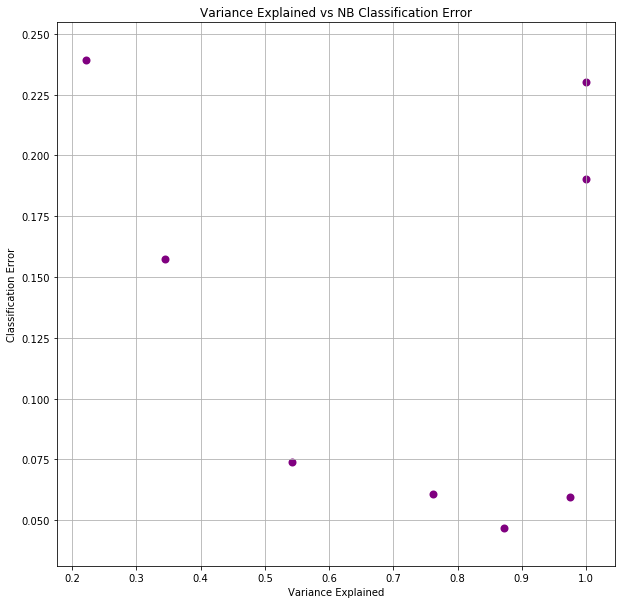

In [44]:
plt.figure(figsize=(10,10))
#plt.yticks(error)
ticks = [str(round(x,3)) for x in error]
#ticks
#error
plt.scatter(var_explained, error, color = 'purple', linewidth = 2)
plt.xlabel('Variance Explained')
plt.ylabel('Classification Error')
plt.grid()
plt.title('Variance Explained vs NB Classification Error')
#plt.plot
#plt.bar(x = [1,2,3,4,5,6,7,8], height = error)
#for i in range(0, len(var_explained)):
#    plt.text(x = var_explained[i], y = ticks[i], s = ticks[i])

plt.show()

## Part 5

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
extract_lda2 = LDA(n_components=2)
X = dataB.iloc[:, 0:784].values
Y = new_dataB["gnd"].values
Y
extract_dataB_lda2 = extract_lda2.fit_transform(X, Y)
lda_comp = pd.DataFrame(extract_dataB_lda2)
lda_comp = pd.concat([lda_comp, new_dataB["gnd"]], axis=1)
lda_comp.head()

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

0         1  gnd
0 -5.277233 -2.052912    0
1 -5.913727 -1.953482    0
2 -4.154543 -0.868888    0
3 -6.728769 -2.568941    0
4 -6.977105 -2.125944    0

In [46]:
new_dataB.iloc[:, 785].values

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

Text(0.5,0,'LDA Component')

Text(0,0.5,'Class')

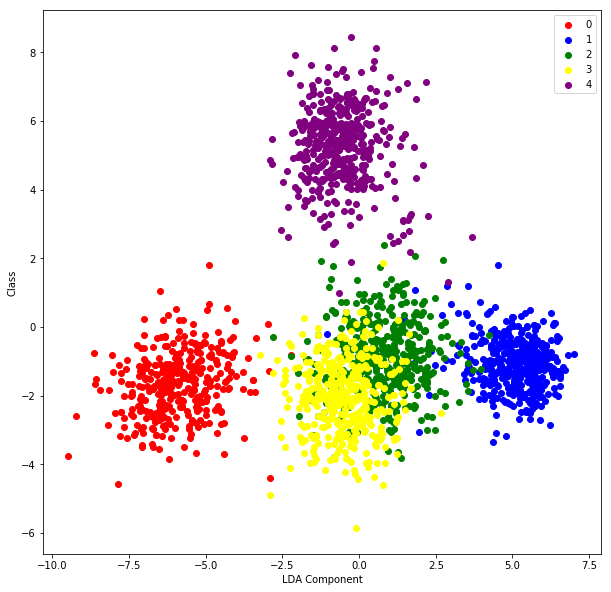

In [47]:
X = []
Y = []
colors = ['red', 'blue', 'green', 'yellow', 'purple']
plt.figure(figsize=(10, 10))
#plt.xlim(-500**14, 500**14, 0.01)
# Plotting datapoints by the values in "gnd" and color by the values.
for i in range(0, len(lda_comp["gnd"].unique())):
    X.append(lda_comp[lda_comp["gnd"] == i].iloc[:, 0].values)
    Y.append(lda_comp[lda_comp["gnd"] == i].iloc[:, 1].values)
    plt.scatter(X[i], Y[i], c=colors[i])
plt.legend(principal_comp["gnd"].unique())
#plt.xscale(scale = [-5:5:0.01])
plt.xlabel("LDA Component")
plt.ylabel("Class")

In [48]:
# We can observe much more class separation using top 2 LDA components than what top 2 PCA components 
# gave. So we can say that LDA does a better job at separating the classes. From LDA all classes are appearing
# to be separate. 
# Because LDA works to increase the inter-class variation as much as possible, we get a more discriminating result for each class.
# It maximizes the difference between the centroid of each class.

## Task III

In [55]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from PIL import Image
InteractiveShell.ast_node_interactivity = "none"

## Part 3.1 Applying LLE on Digit 3 (based on gnd=3)

In [50]:
#Data Readiness and Picking all 3 digits
df=pd.read_csv("DataB.csv",sep=',',header=0)
all_three= df['gnd']==3
df= df[all_three]

df_plt=df.iloc[:,1:786]
df=df.iloc[:,1:785]
df.shape
df_matrix=df.as_matrix()
np_matrix=np.array(df_matrix)

(398, 784)

In [51]:
#Making Images
train_df = pd.DataFrame(np_matrix)
mat28x28 = train_df.values.reshape((train_df.shape[0],28,28))

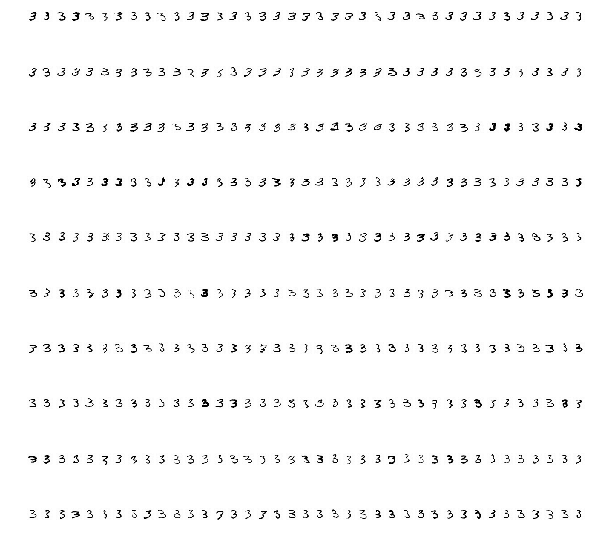

In [56]:
#Visualzing all 3s and Saving image for further analysis
plt.figure(figsize=(10,10))
dpi=500
for index in range(0,390):
    plt.subplot(10, 39, index + 1)
    plt.axis('off')
    plt.imshow(mat28x28[index], cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.title('%i' % index)
#plt.savefig("whole_figure.png",dpi=dpi, transparent=True)

In [57]:
# Locally linear embedding of the digits dataset
lle_extract = manifold.LocallyLinearEmbedding(5, n_components=4,method='standard')
X_lle = lle_extract.fit_transform(train_df)

manifold_2D = pd.DataFrame(X_lle, columns=['Component 1', 'Component 2','Component 3','Component 4'])
print('Done')

Done


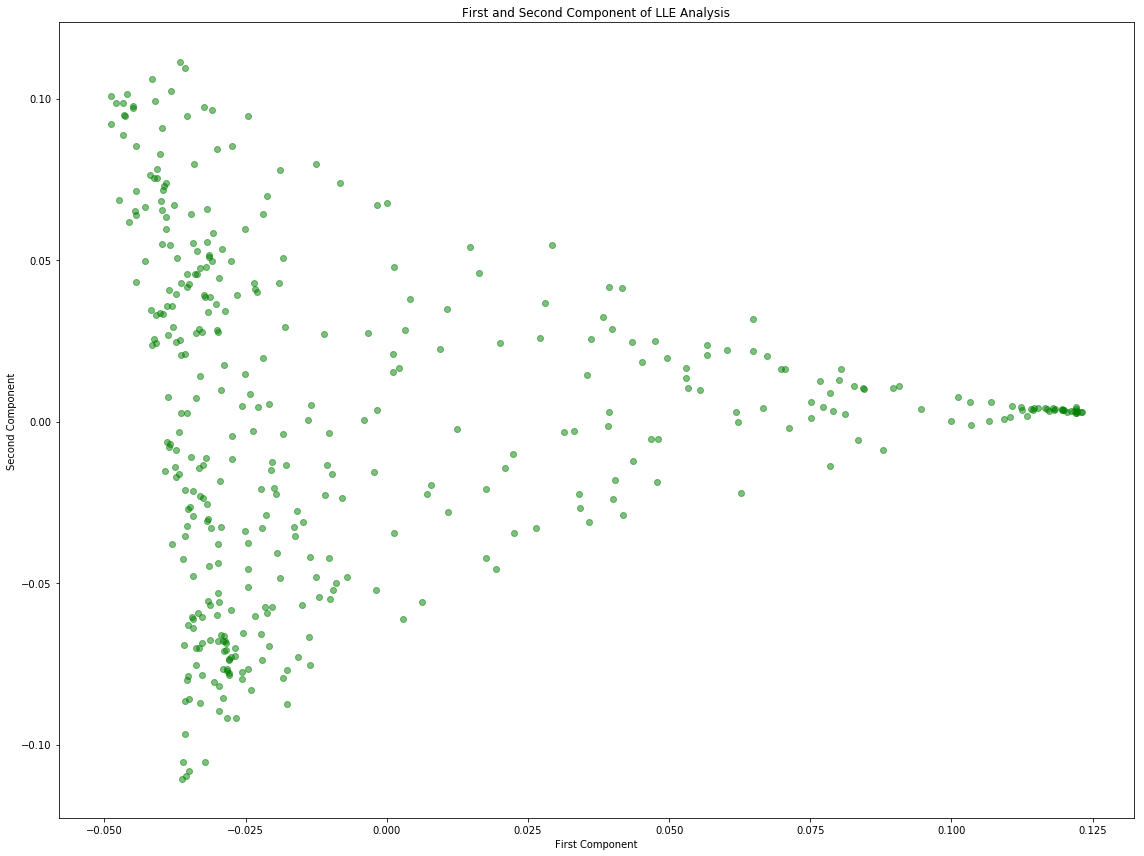

In [58]:
#Simple plotting of points of First and Second components
plt.figure(figsize=(16,12))
for index in range(0,398):
    plt.scatter(X_lle[index][0], X_lle[index][1],color='green', label='input scale', alpha=0.5)

    plt.title('First and Second Component of LLE Analysis')
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    plt.grid()
    plt.tight_layout()

plt.show()

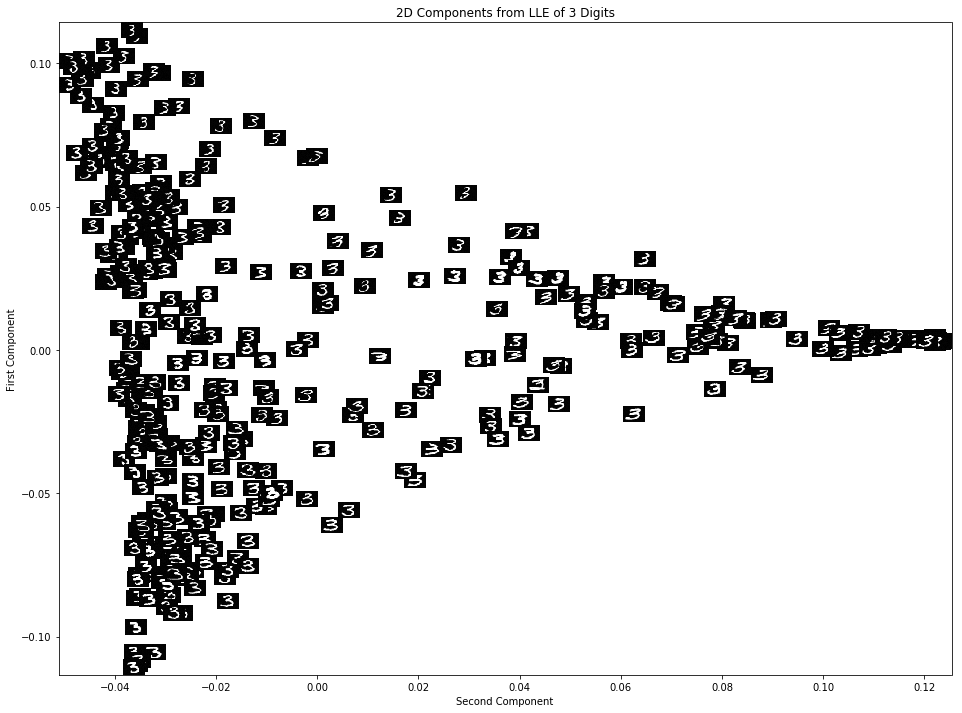

In [59]:
#Plotting of digits based on the First and Second components to identify pattern
fig = plt.figure()
fig.set_size_inches(16, 12)
ax = fig.add_subplot(111)
ax.set_title('2D Components from LLE of 3 Digits')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show all of the images on the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.025
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.025
for i in range(398):
    #img_num = np.random.randint(0, 398)
    x0 = manifold_2D.loc[i, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[i, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[i, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[i, 'Component 2'] + (y_size / 2.)
    img = train_df.iloc[i,:].values.reshape(28, 28)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray,interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('First Component')
ax.set_xlabel('Second Component')

#plt.savefig("LLE.png",dpi=300, transparent=True)
plt.show()

### Looking at the first and second component mapping we are able to see 3 groups:
1. G1 - One having 'more vertical variation'
2. G2 - Another having 'less vertical variation'
3. G3 - Middle Group - Middle of the horizontal and vertical axes

### G1 - More Vertical Variation Group:
1. The 3s are more upright
2. The lower curvature of 3 varies from small to big on the vertical movement

### G2 - Less Vertical Variation Group:
1. They are more slanted to the right and not as upright


### G3 - Middle Group:
1. The middle group have more squished upper and lower curvatures of 3


## 3.2 Applying ISOMAP on Digit 3 (based on gnd=3)

In [60]:
# Perfoming ISOMAP on the digits dataset
isofold_2D=[]
X_iso = manifold.Isomap(5, n_components=4).fit_transform(train_df)
print("Done.")
isofold_2D = pd.DataFrame(X_iso, columns=['Component 1', 'Component 2','Component 3','Component 4'])

Done.


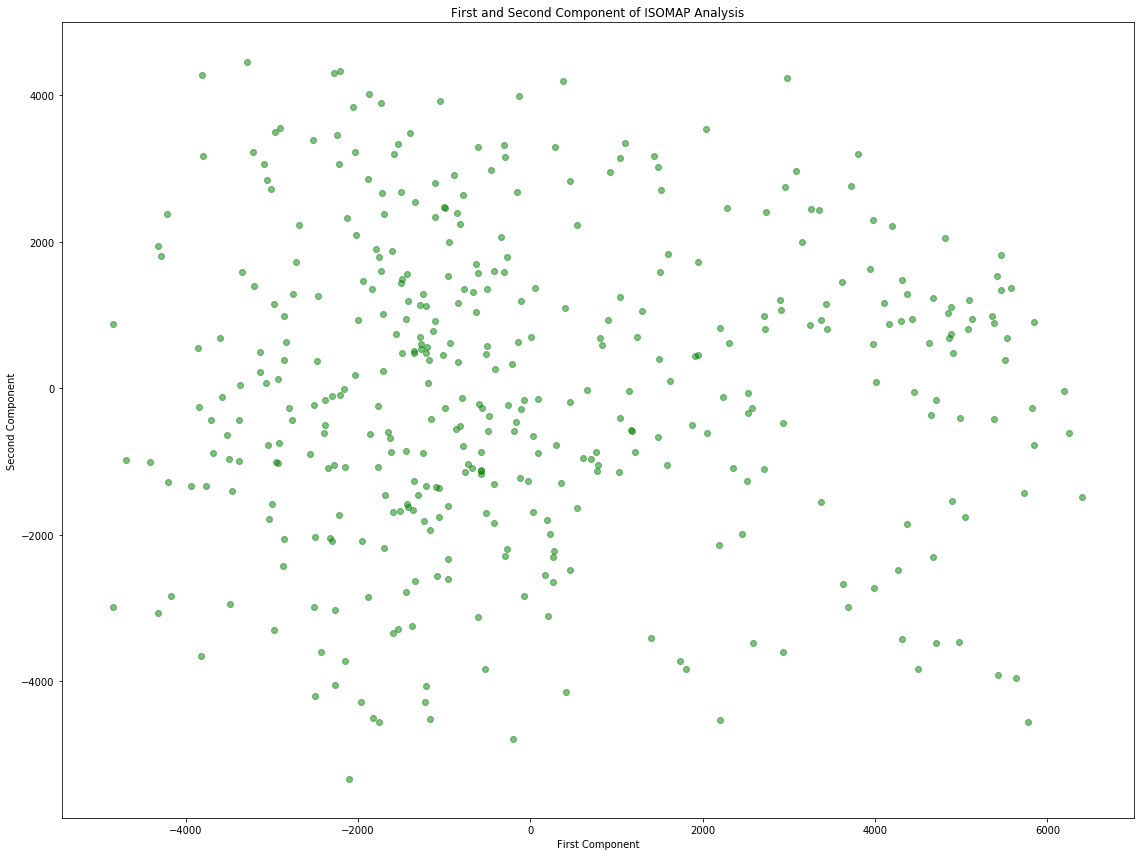

In [61]:
#Simple plotting of points of First and Second components
plt.figure(figsize=(16,12))
for index in range(0,398):
    plt.scatter(X_iso[index][0], X_iso[index][1],color='green', label='input scale', alpha=0.5)

    plt.title('First and Second Component of ISOMAP Analysis')
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    plt.grid()
    plt.tight_layout()

plt.show()

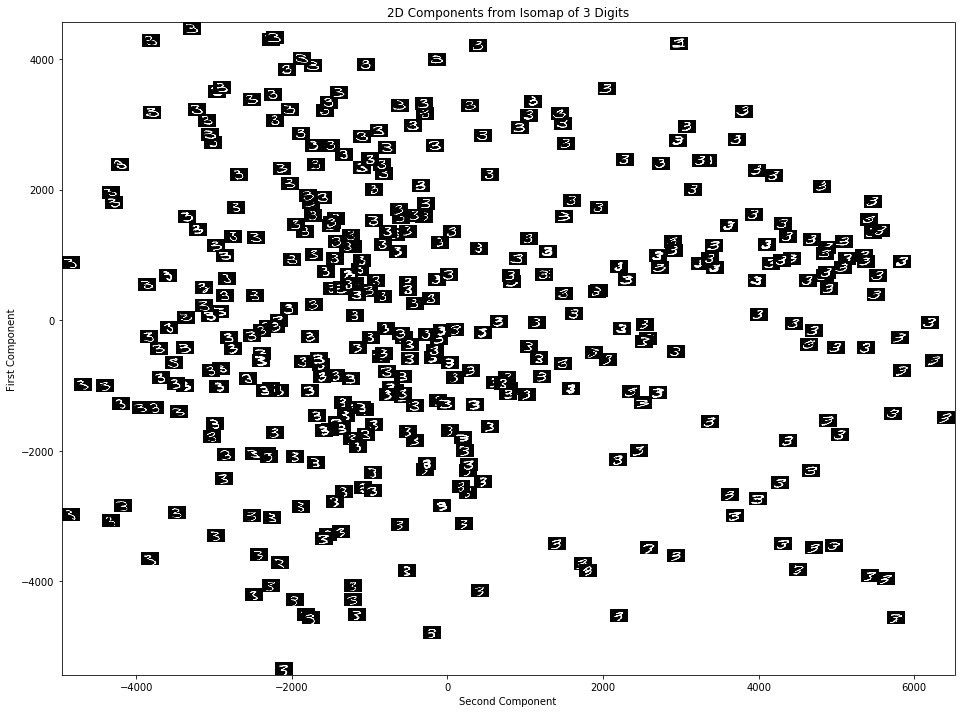

In [62]:
#Plotting of digits based on the First and Second components to identify pattern
fig = plt.figure()
fig.set_size_inches(16, 12)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of 3 Digits')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show images ont the plot
x_size = (max(isofold_2D['Component 1']) - min(isofold_2D['Component 1'])) * 0.02
y_size = (max(isofold_2D['Component 2']) - min(isofold_2D['Component 2'])) * 0.02
for i in range(398):
    #img_num = np.random.randint(0, 398)
    x0 = isofold_2D.loc[i, 'Component 1'] - (x_size / 2.)
    y0 = isofold_2D.loc[i, 'Component 2'] - (y_size / 2.)
    x1 = isofold_2D.loc[i, 'Component 1'] + (x_size / 2.)
    y1 = isofold_2D.loc[i, 'Component 2'] + (y_size / 2.)
    img = train_df.iloc[i,:].values.reshape(28, 28)
    #img = train_df.iloc[img_num,:].values.reshape((train_df.shape[0],28,28))
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray,interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(isofold_2D['Component 1'], isofold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('First Component')
ax.set_xlabel('Second Component')

plt.show()

### There is a distinction of 2 group being formed on the horizontal movement one on left and another or right
1. G1 - The right most one 3 are slanted to the right 
2. G2 - The left group is slanted to the left

### There is a distinction of 2 group being formed on the vertical movement one on top and another or bottom
1. G1 - The Bottom ones have a flatter lower curvature of 3
2. G2 - The Top group has a curvier curvature of 3, hence the lower curvature missclassifies 2 as three as the line gives a bigger lower curvature

### There is another group in the middle 
1. G1 - Middle Group has squished  curvatures (upper and lower) 


### Conclusion:
1. Looking at the grouping of ISOMAP vs LLE, in ISOMAP there are more distinct groups as compared to LLE. giving more clear distinctions between 3's, if we plotted all numbers instead of 3 we would see clear groups of all individual numbers. ISOMAP is better than LLE.
2. The patterns in Isomap are found globally



## Further Analysis to show ISOMAP is better: 
### ISOMAP : Clear Groups can be seen for each number with 2 Components Analysis Only

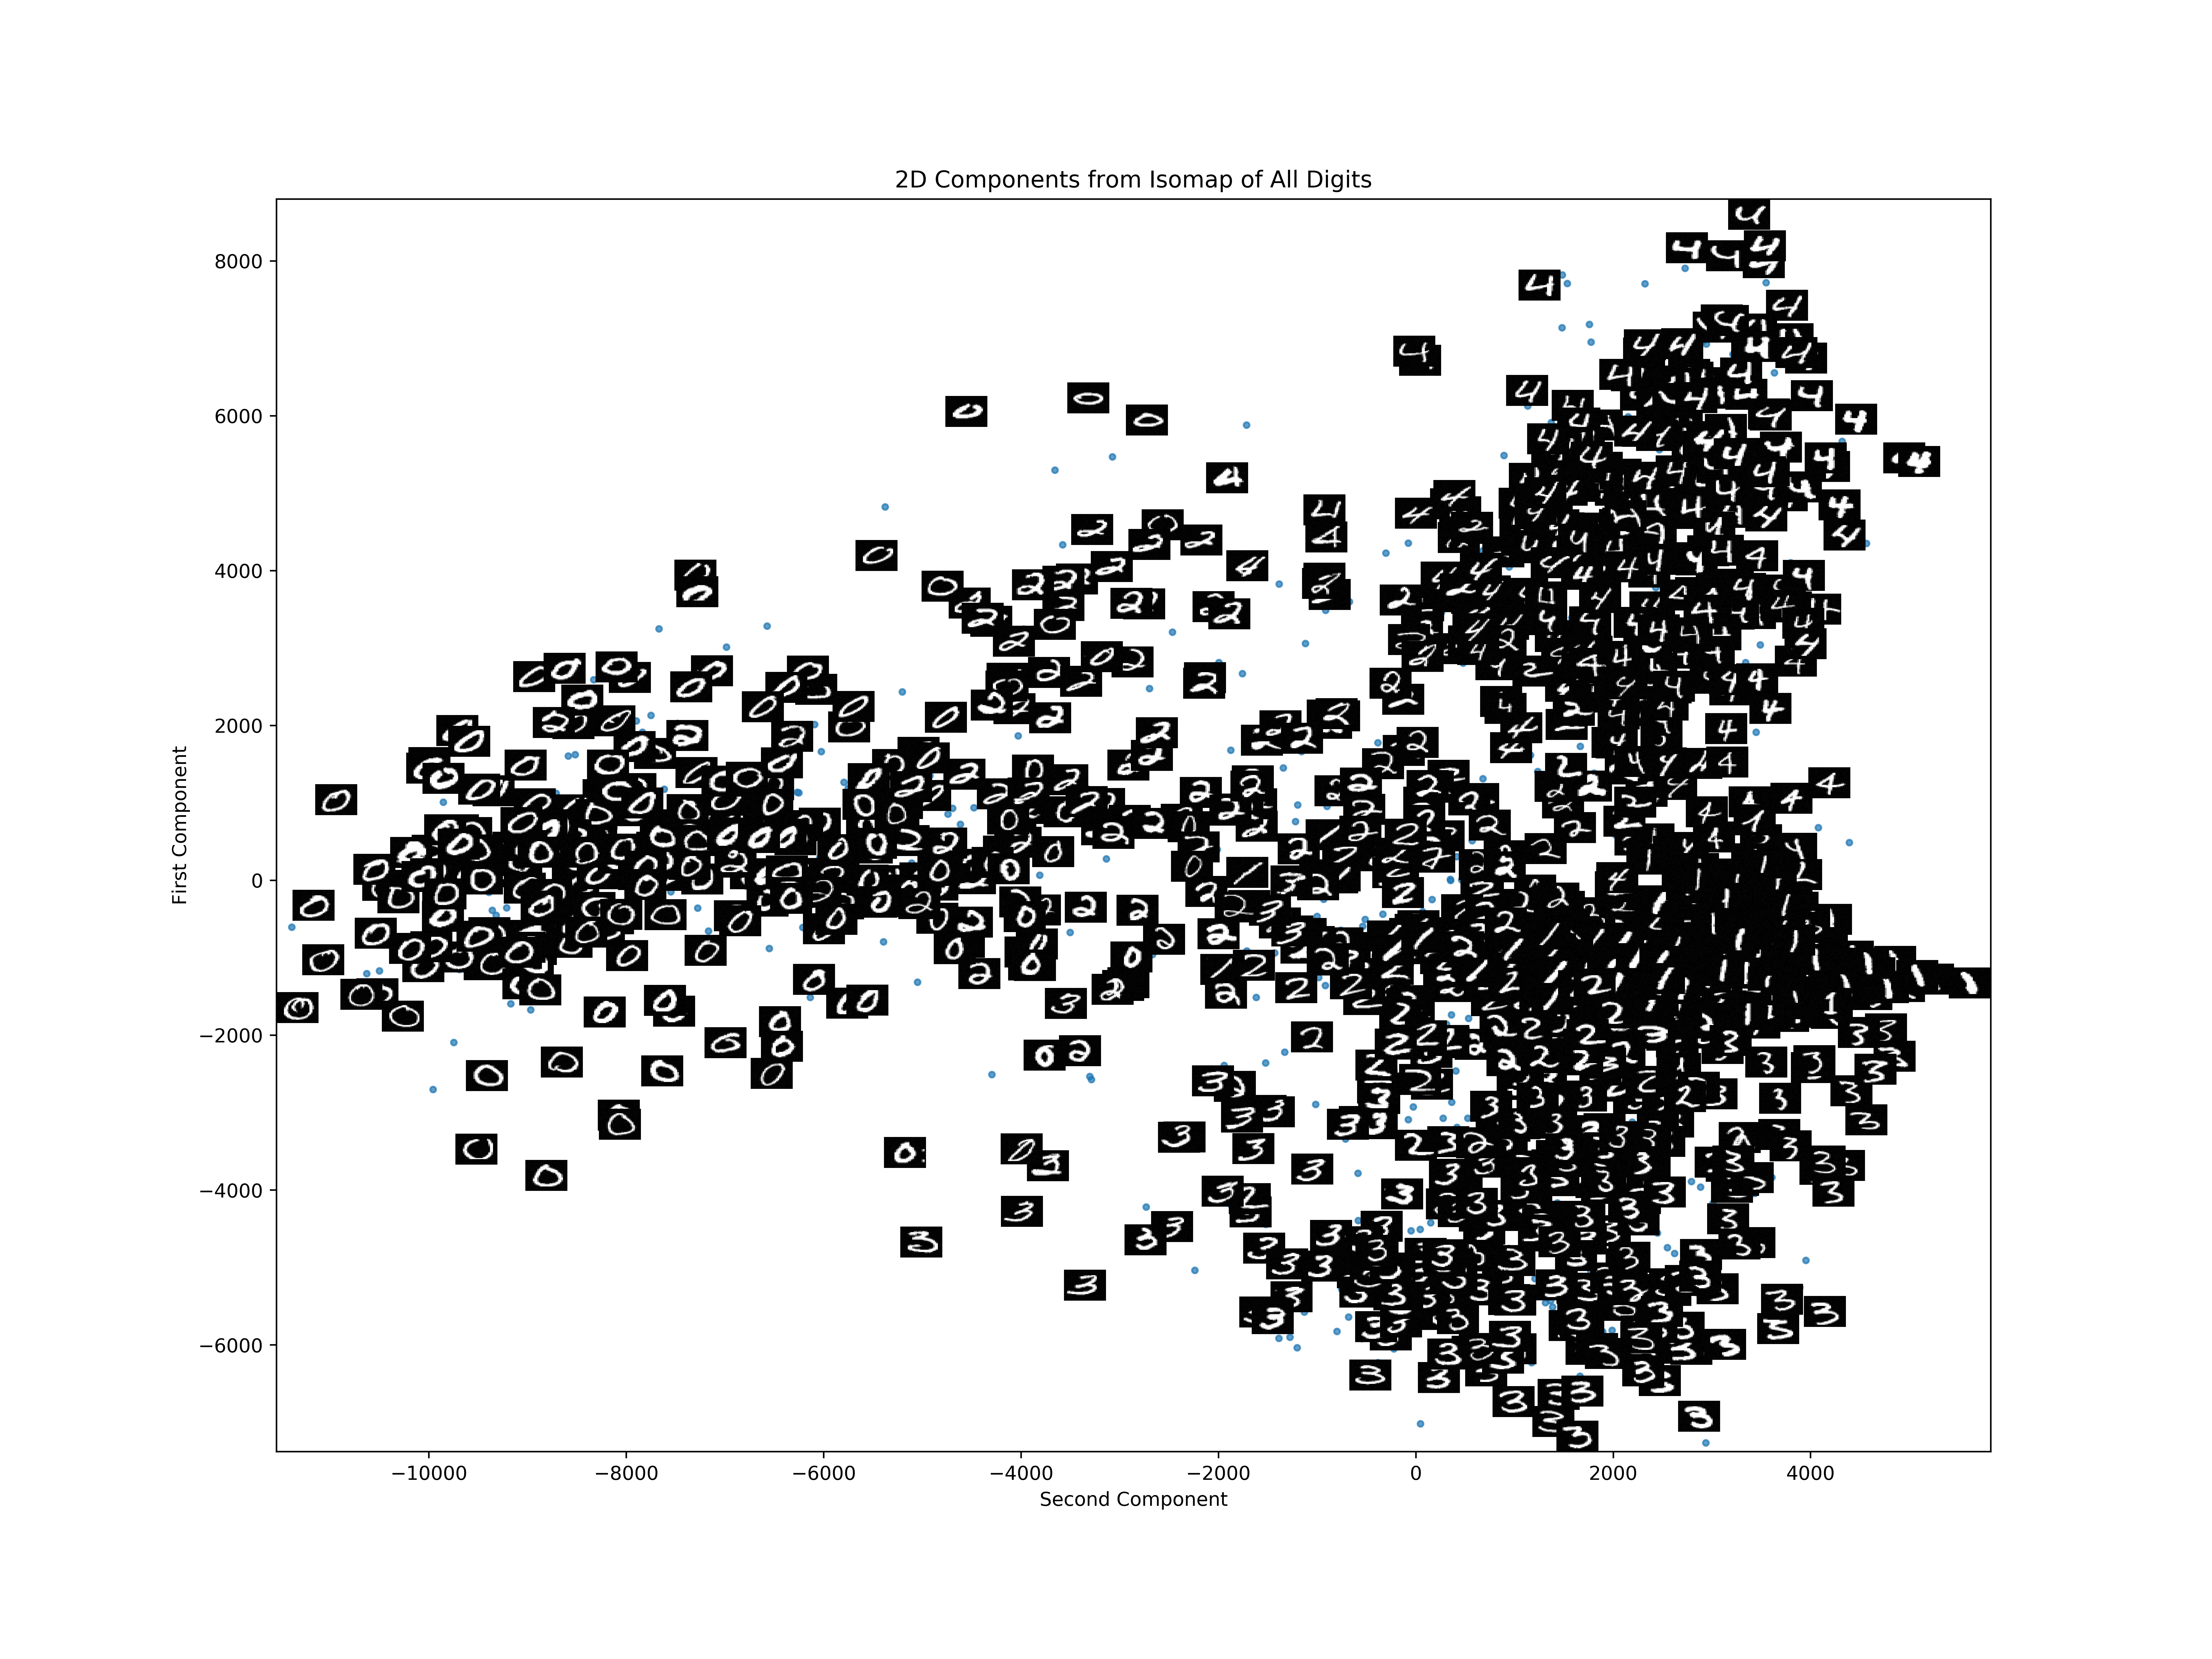

### LLE : No clear sense of groups for each digit on first 2 components (proving isomap is better)

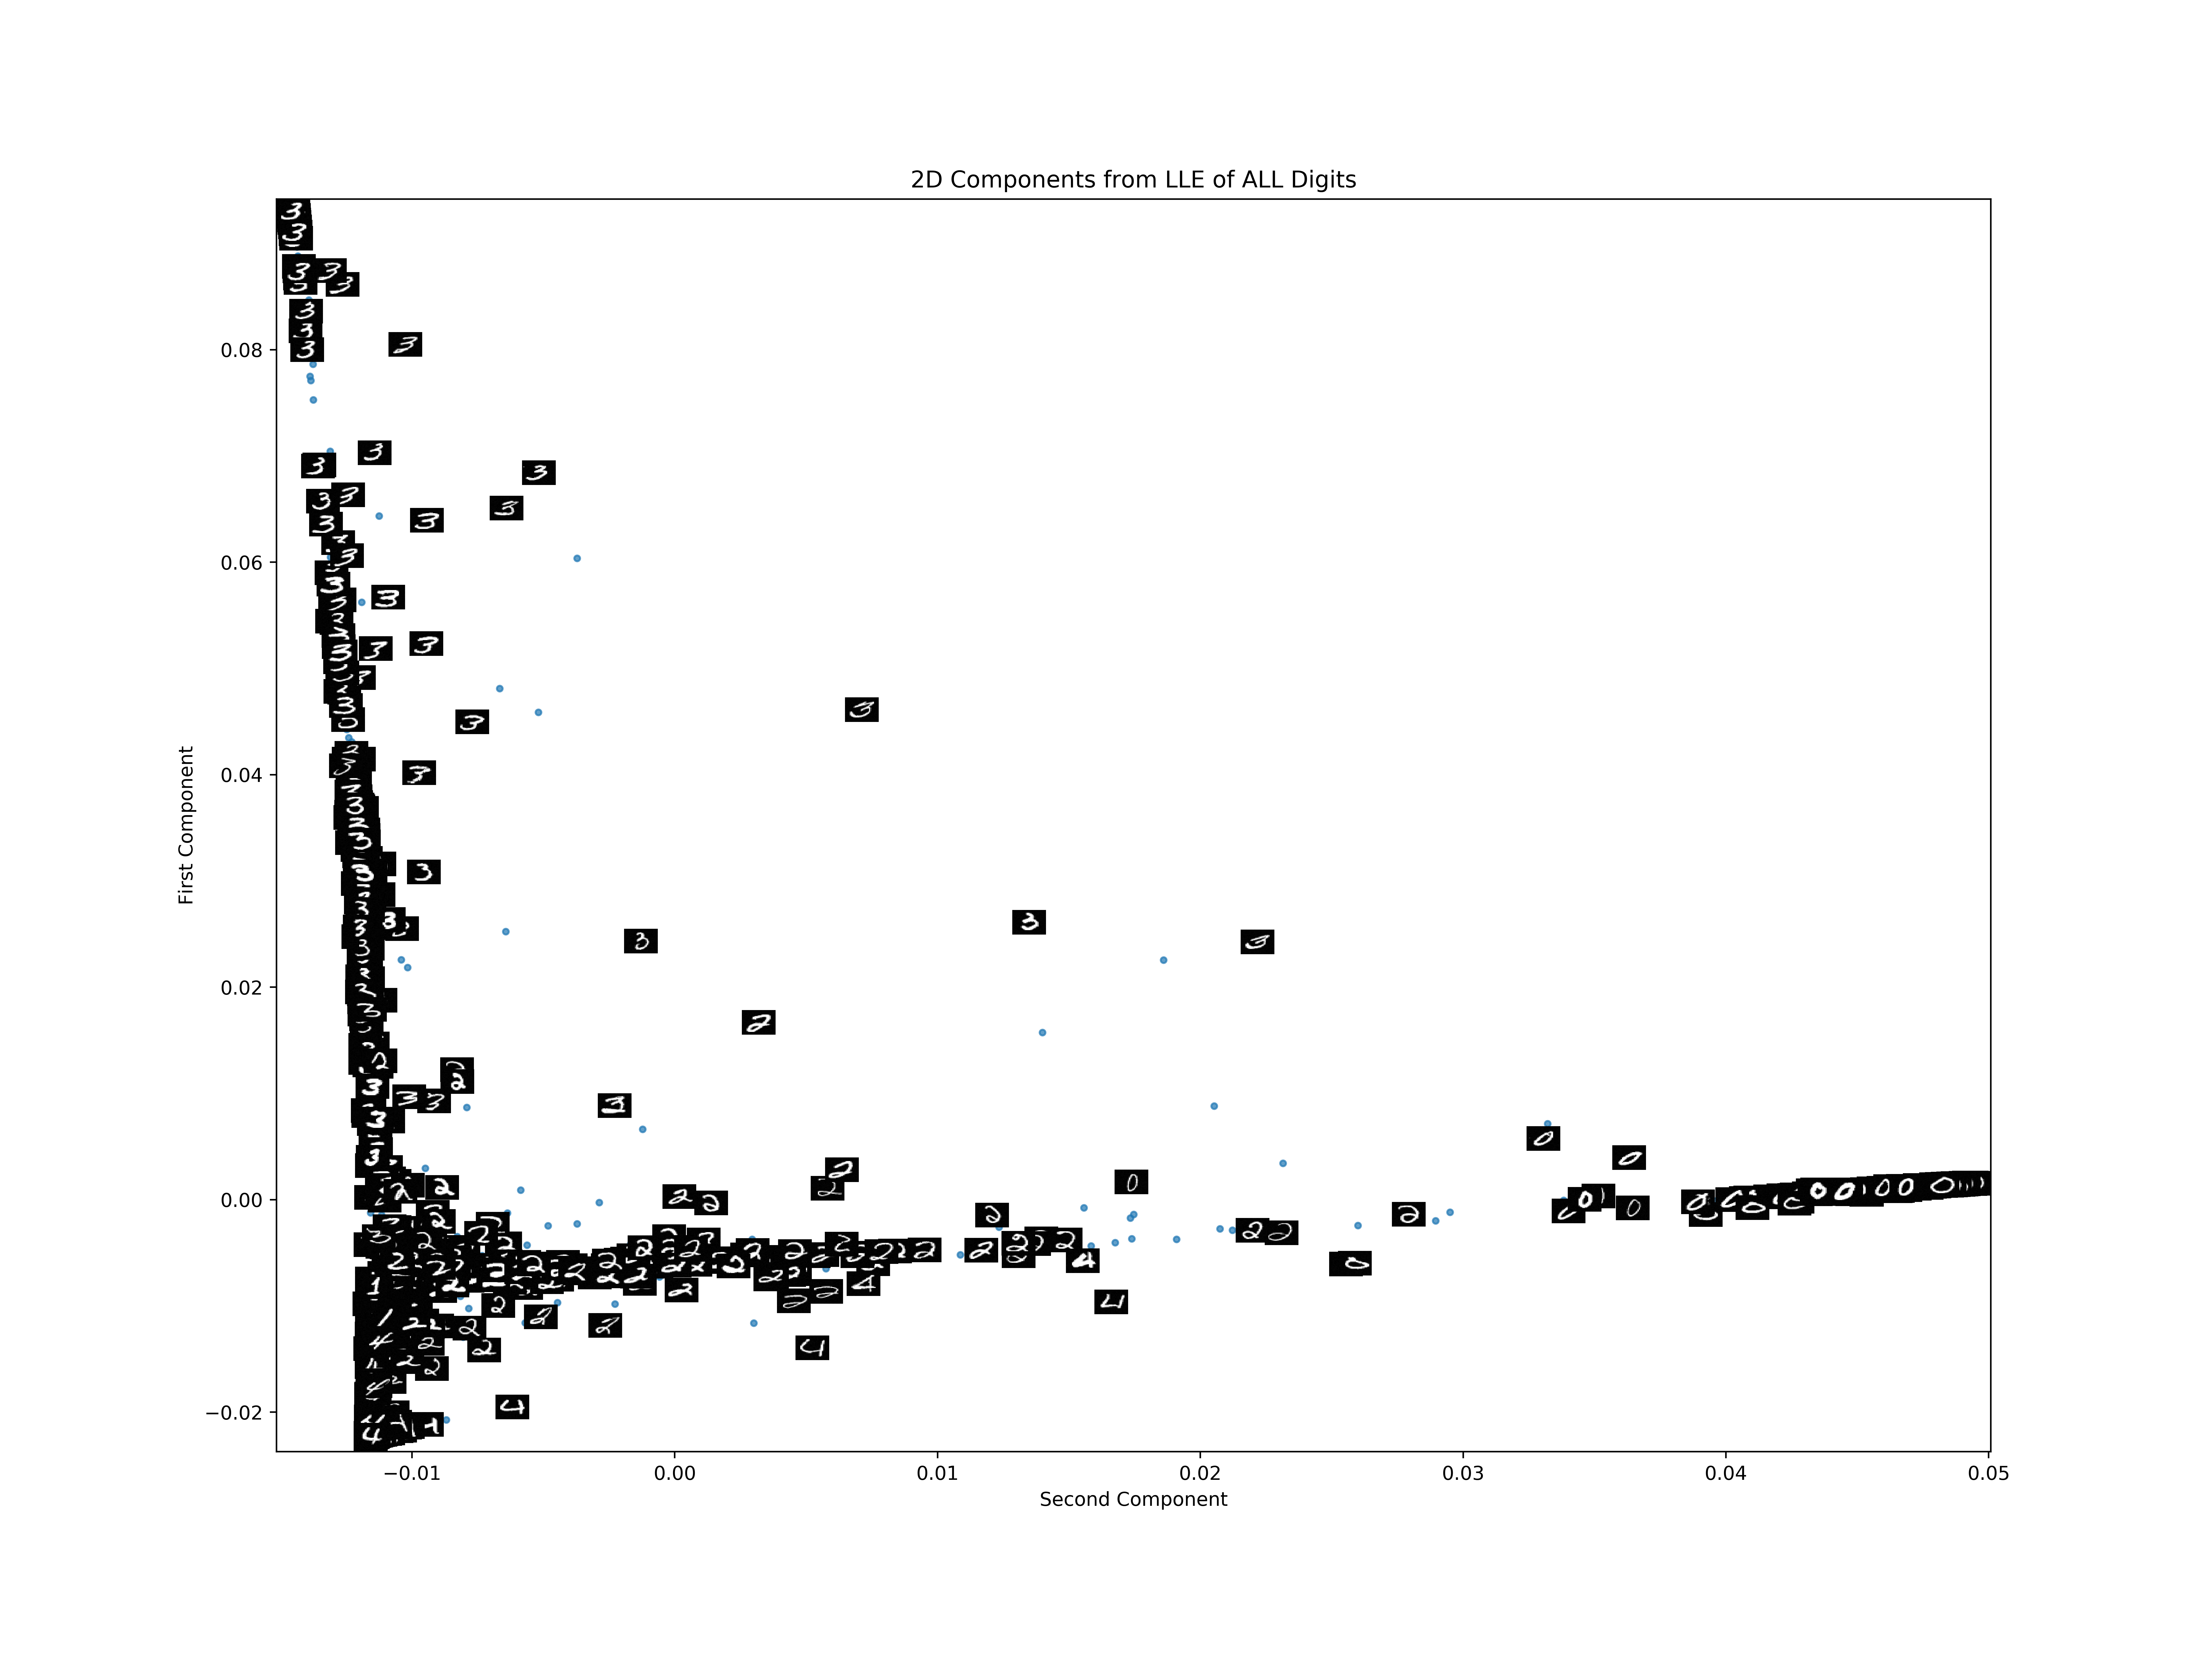

## PART 3.3.1 (Naive Bayes on LLE) With N Iterations

### Assumption:
#### Taking the assumption that training and testing of 4 components using both LLE and ISOMAP are to be run for all the digits and not just for digit 3.

In [63]:
df_classifcaition = pd.read_csv("DataB.csv",sep=',',header=0)
df_classifcaition=df_classifcaition.iloc[:,1:786]
df_classifcaition.shape
df_classifcaition.head()

In [64]:
#Performing LLE on all data
LLE_extract = manifold.LocallyLinearEmbedding(5, n_components=4,method='standard')
LLE_TRANSFORM = LLE_extract.fit_transform(df_classifcaition)


LLE_COMPONENT4 = pd.DataFrame(LLE_TRANSFORM)
LLE_COMPONENT4 = pd.concat([LLE_COMPONENT4, df_classifcaition["gnd"]], axis=1)
LLE_COMPONENT4.head()

In [74]:
results_LLE=[]
#Number of iteraations
N=30
#N times 70/30 Split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

for i in range(0,N):
    train_lle, test_lle = train_test_split(LLE_COMPONENT4, test_size=0.3)

    #Training Data
    gnb = GaussianNB()
    gnb.fit(train_lle[train_lle.columns[0:3]].values, train_lle["gnd"])

    #Testing Data
    predict_lle_4 = gnb.predict(test_lle[test_lle.columns[0:3]])
    
    #Storing Accuracies
    results_LLE.append(metrics.accuracy_score(test_lle['gnd'], predict_lle_4))
    
mean_lle=np.mean(results_LLE)

print("Average Mean of Accuracies of LLE is:  %g" % round(mean_lle,3),"With %g Iterations" % N)

Average Mean of Accuracies of LLE is:  0.92 With 30 Iterations


#### At 10 iterations - AVG Accuracy = Varies between 0.914- 0.917
#### At 20 Iteration - AVG Accuracy = Varies between 0.916 and 0.919
#### At 30 Iteration - AVG Accuracy = Varies between 0.919 and 0.92
#### At 50 Iteration - AVG Accuracy = Varies between 0.918 and 0.919
#### At 75 Iteration - AVG Accuracy = Variesbetween 0.918 and 0.919
#### At 100 Iteration - AVG Accuracy = between 0.919 and 0.920
#### At 200 Iteration - AVG Accuracy = between 0.919 and 0.920
#### At 5000 Iteration - AVG Accuracy = 0.919

## PART 3.3.2 (Naive Bayes on ISOMAP) With N Iterations

In [75]:
#Performing ISOMAP on all data
ISO_EXTRACT = manifold.Isomap(5, n_components=4)
ISO_TRANSFORM = ISO_EXTRACT.fit_transform(df_classifcaition)


ISO_COMPONENT4 = pd.DataFrame(ISO_TRANSFORM)
ISO_COMPONENT4 = pd.concat([ISO_COMPONENT4, df_classifcaition["gnd"]], axis=1)
ISO_COMPONENT4.head()

In [79]:
results_ISOMAP=[]
#Number of iterations
N=30
#N times 70/30 Split
for i in range(0,N):
    train_iso, test_iso = train_test_split(ISO_COMPONENT4, test_size=0.3)

    #Training Data
    gnb = GaussianNB()
    gnb.fit(train_iso[train_iso.columns[0:3]].values, train_iso["gnd"])

    #Testing Data
    predict_iso_4 = gnb.predict(test_iso[test_iso.columns[0:3]])
    
    #Storing Accuracies
    results_ISOMAP.append(metrics.accuracy_score(test_iso['gnd'], predict_iso_4))
    
mean_iso=np.mean(results_ISOMAP)

print("Average Mean of Accuracies of ISOMAP is:  %g" % round(mean_iso,3),"With %g Iterations" % N)

Average Mean of Accuracies of ISOMAP is:  0.862 With 30 Iterations


#### At 10 iterations - AVG Accuracy = Varies between 0.855- 0.858
#### At 20 Iteration - AVG Accuracy = Varies between 0.855 and 0.864
#### At 30 Iteration - AVG Accuracy = Varies between 0.860 and 0.862
#### At 50 Iteration - AVG Accuracy = Varies between 0.860 and 0.862
#### At 75 Iteration - AVG Accuracy = Variesbetween 0.859 and 0.862
#### At 100 Iteration - AVG Accuracy = between 0.860 and 0.862
#### At 200 Iteration - AVG Accuracy = between 0.858 and 0.859
#### At 1000 Iteration - AVG Accuracy ~= 0.860

## Conclusion 3.3.3:
### Number of Iteration for LLE and ISOMAP
LLE : For LLE the AVG Accuracy @ 5000 Iteration is 0.919, which can be seen by 20 - 30 iterations so they are enough
ISOMAP: For ISOMAP the AVG Accuracy @ 5000 iteration is 0.860, which can be seen as early as 30 Iterations which are enough.

### Perfomance Comparison: 
LLE AND ISOMAP both will perform better than PCA and LDA based on the notion that LLE and ISOMAP take into consideration the nearest neighbours (locally for LLE, globally for ISOMAP) . The accuracy will be better as long as the non-linear assumption holds with adequate number of K neighbours input to LLE/ISOMAP.
This is further visible from example of PCA resultbelow proving that PCA did not give a better result. LDA however does take into account the identifying class and could give a better Accuracy.

### Extra PCA Analysis

In [80]:
#Performing PCA on all data
from sklearn.decomposition import PCA
PCA_extract = PCA(n_components=4)
PCA_TRANSFORM = PCA_extract.fit_transform(df_classifcaition)


PCA_COMPONENT4 = pd.DataFrame(PCA_TRANSFORM)
PCA_COMPONENT4 = pd.concat([PCA_COMPONENT4, df_classifcaition["gnd"]], axis=1)


results_PCA=[]
N=5000
#N times 70/30 Split

for i in range(0,N):
    train_PCA, test_PCA = train_test_split(PCA_COMPONENT4, test_size=0.3)

    #Training Data
    gnb = GaussianNB()
    gnb.fit(train_PCA[train_PCA.columns[0:3]].values, train_PCA["gnd"])

    #Testing Data
    predict_PCA_4 = gnb.predict(test_PCA[test_PCA.columns[0:3]])
    
    #Storing Accuracies
    results_PCA.append(metrics.accuracy_score(test_PCA['gnd'], predict_PCA_4))
    
mean_PCA=np.mean(results_PCA)

print("Average Mean of Accuracies of PCA is:  %g" % round(mean_PCA,3),"With %g Iterations" % N)

Average Mean of Accuracies of PCA is:  0.824 With 5000 Iterations
